In [1]:
import pandas as pd
from glob import glob

In [ ]:
police_list = glob('./data/*경찰청.csv')

In [3]:
police_list

[]

In [4]:
police_df = pd.DataFrame()
for police in police_list:
    tmp = pd.read_csv(police)
    police_df = pd.concat([police_df, tmp])

In [5]:
police_df

""


In [6]:
si_list = glob('*시.csv')

In [7]:
si_list

[]

In [8]:
si_df = pd.DataFrame()
for si in si_list:
    tmp = pd.read_csv(si)
    si_df = pd.concat([si_df, tmp])

In [9]:
si_df.head()

""


In [10]:
df = pd.read_csv('msg2.csv')

In [11]:
import re

In [12]:
example="New competition launched :https://www.kaggle.com/c/nlp-getting-started"
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

remove_URL(example)

'New competition launched :'

In [13]:
df.msg = df.msg.dropna().apply(lambda x: remove_URL(x))

In [14]:
import pandas as pd
import numpy as np
from tqdm import tqdm, trange
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.cluster import KMeans

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from keybert import KeyBERT
from soykeyword.lasso import LassoKeywordExtractor
import pickle

def preprocess_data(sentences):
    # TF-IDF 벡터화
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(sentences)

    # TfidfVectorizer 모델 저장
    with open('./model/tfidf_vectorizer.pkl', 'wb') as f:
        pickle.dump(vectorizer, f)
    return X

def cluster_sentences(sentences, num_clusters):
    X = preprocess_data(sentences)

    # K-means 클러스터링
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(X)

    return X, kmeans.labels_

def get_cluster_keywords(sentences, cluster_labels, num_keywords):
    extractor = LassoKeywordExtractor(
        # tokenizer='noun',
        min_tf=1,
        verbose=False
    )
    keywords = []

    for i in range(max(cluster_labels)+1):
        cluster_sentences = [sentences[j] for j, label in enumerate(cluster_labels) if label == i]
        cluster_keywords = extractor.extract_from_sentences(cluster_sentences, topk=num_keywords)
        keywords.append(cluster_keywords)

    return keywords


# 사용자 입력 문장 리스트
sentences = df.msg.dropna().tolist()

# # 군집 수
# num_clusters = 8

# # 사용자 입력 군집화
# X, cluster_labels = cluster_sentences(sentences, num_clusters)

# # 군집별 키워드 추출
# num_keywords = 3
# cluster_keywords = get_cluster_keywords(sentences, cluster_labels, num_keywords)


In [192]:
import pickle

In [193]:
def preprocess_data(sentences):
    # TF-IDF 벡터화
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(sentences)

    # TfidfVectorizer 모델 저장
    with open('./model/tfidf_vectorizer.pkl', 'wb') as f:
        pickle.dump(vectorizer, f)
    return X

In [194]:
# 사용자 입력 문장 리스트
sentences = df.msg.dropna().tolist()

In [195]:
preprocess_data(sentences)

<60572x93323 sparse matrix of type '<class 'numpy.float64'>'
	with 902459 stored elements in Compressed Sparse Row format>

In [196]:
import torch

def preprocess_tdata(sentences):
    # TF-IDF 벡터화
    # 저장된 TfidfVectorizer 모델 불러오기
    with open('./model/tfidf_vectorizer.pkl', 'rb') as f:
        vectorizer = pickle.load(f)
    X = vectorizer.transform(sentences)
    return X

def predict_cluster(new_data):
    # 저장된 K-means 모델 불러오기
    kmeans = torch.load('./model/kmeans_final_8')

    # 새로운 데이터 전처리
    new_data_vectorized = preprocess_tdata(new_data)

    # 새로운 데이터의 군집 예측
    predicted_cluster = kmeans.predict(new_data_vectorized)

    return predicted_cluster

# 예측하고자 하는 새로운 데이터
new_data = ["오늘 19:00경 금정구 두구동 인근에서 발생한 화재로 인해 연기 및 타는 냄새가 날 수 있으니 인근 주민은 안전에 유의하시길 바랍니다.",'북구에서 실종된 강대옥씨(남, 74세)를 찾습니다 - 173cm, 50kg, 검정잠바, 검정바지, 남색운동화 vo.la/njkro / ☎182']

# 새로운 데이터의 군집 예측
predicted_cluster = predict_cluster(new_data)

print("새로운 데이터의 예측 군집:", predicted_cluster)

In [197]:
# 예측하고자 하는 새로운 데이터
new_data = ["오늘 19:00경 금정구 두구동 인근에서 발생한 화재로 인해 연기 및 타는 냄새가 날 수 있으니 인근 주민은 안전에 유의하시길 바랍니다.",'북구에서 실종된 강대옥씨(남, 74세)를 찾습니다 - 173cm, 50kg, 검정잠바, 검정바지, 남색운동화 vo.la/njkro / ☎182']

# 새로운 데이터의 군집 예측
predicted_cluster = predict_cluster(new_data)

print("새로운 데이터의 예측 군집:", predicted_cluster)

새로운 데이터의 예측 군집: [5 0]


In [ ]:
import torch

In [ ]:
df= df[df.msg.isna() == False]

In [56]:
torch.save(kmeans, './model/kmeans_6')
# loaded_kmeans = torch.load('./model/kmeans_6')

In [ ]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=2)

# Fit and transform the data
# X_svd_dense = svd.fit_transform(X_dense)
X_svd_sparse = svd.fit_transform(X)

print(X_svd_sparse)

[[ 0.00945816  0.00184194]
 [ 0.00898515  0.00177694]
 [ 0.05328842 -0.03611424]
 ...
 [ 0.00593238 -0.01855446]
 [ 0.00569802 -0.01796964]
 [ 0.01428467 -0.0197678 ]]


In [ ]:
svd = pd.DataFrame(X_svd_sparse)
svd.columns = ['x','y','labels']
svd['labels'] = labels

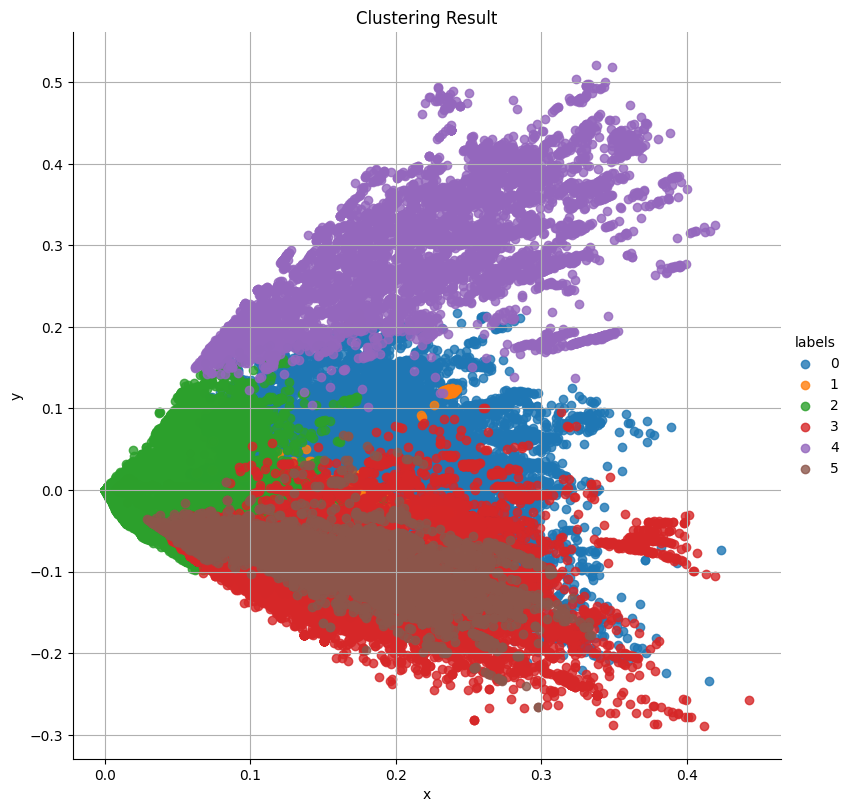

In [ ]:
sns.lmplot(x='x', y='y', hue="labels", data=svd, fit_reg=False, height=8)
plt.title("Clustering Result")
plt.grid()

In [17]:
# # 차원 축소 (PCA)
# pca = PCA(n_components=78)
# vectors_78d = pca.fit_transform(X)

In [59]:
df['kmeans_4'] = labels_4

In [62]:
svd['kmeans_4'] = labels_4

In [ ]:
df['kmeans_4'] = labels_4

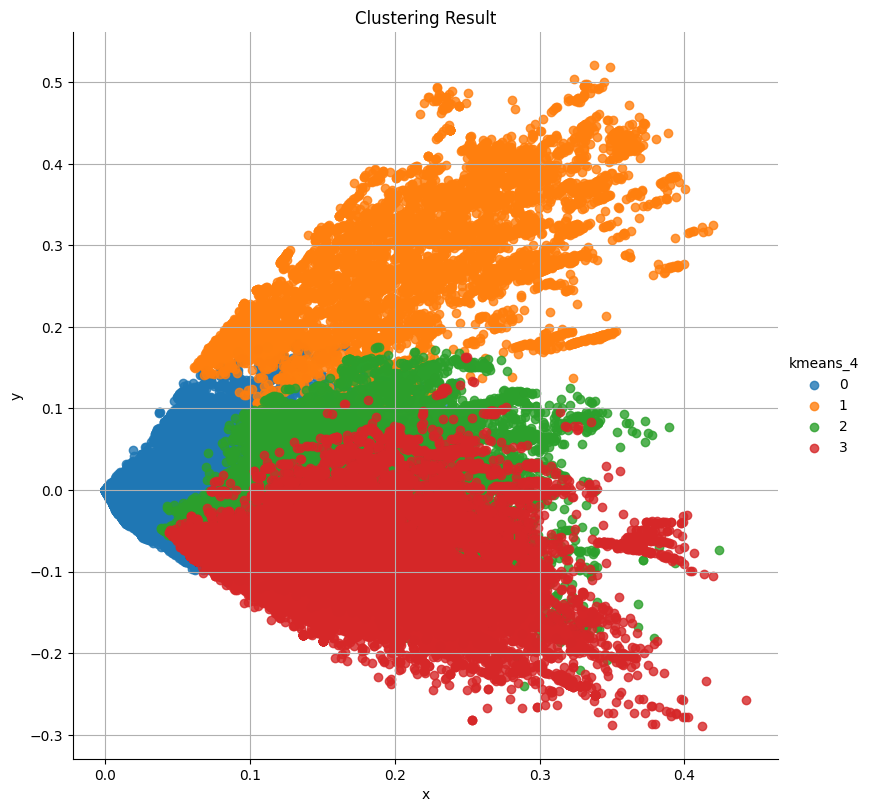

In [64]:
sns.lmplot(x='x', y='y', hue="kmeans_4", data=svd, fit_reg=False, height=8)
plt.title("Clustering Result")
plt.grid()

In [77]:
df.to_csv('df_kmeans.csv', index=False)

In [66]:
from transformers import AutoTokenizer, AutoModel
from bertopic import BERTopic
import torch
from tqdm import tqdm
from wordcloud import WordCloud

In [67]:
# Load pre-trained Korean BERT model and tokenizer
model_name = "kykim/bert-kor-base"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

Some weights of the model checkpoint at kykim/bert-kor-base were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [70]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.font_manager as fm

font_list = fm.findSystemFonts(fontpaths=None, fontext='otf')

# 명사 추출 함수 
import stanza

nlp = stanza.Pipeline('ko')

#불용어 1
stopwords = ['▲','있','하', '것', '들', '그', '되', '수', '이', '보','않', '없', '나', '사람', '주', '아니', '등',
             '같', '우리','때', '년', '가', '한', '지', '대하', '오', '말', '일', '그렇','위하', '근무', '*', '1', 
             '가능', '2', '3', '4', '5','6', '7', '8', '9', '10', '일하실', '분', '(', ')', '우대', '연령대', 
             '기준', '실시', '지급', '기타', '습니다', '관한', '언제든', '주요','중', '아직', '차차','점차', '에', '들',
             '하실','원하시는', '정년', '배우고', '싶으신','업무', '지원', '시간', '관리', '원', '시', '월', '채용',
             '이상', '후', '관련', '명', '직', '사항', '만', '보조', '따르', 'ᆷ','대', '금', '드리', '자', '경우', '배우', 
             '해당', '플라스틱', '대상', '휴무', '오전', '직무', '제출', '형태', '작성', '별도', '문의', '단순', 
              '요건', '모시', '인근', '구인', '근무지', '학력', '경험', '수행''건강', '결정', '공무', '기본', '이용', '활용', 
             '휴게시','근로자', '증명서','거래처', '중식', '최종', '홈페이지']

def extract_nouns(text):
    doc = nlp(text)
    for sentence in doc.sentences:
        for word in sentence.words:
            lemma = word.lemma.split('+')
            xpos = word.xpos.split('+')
            for lem, pos in zip(lemma, xpos):
                if pos.startswith('n'):
                    if lem not in stopwords:
                        if len(lem) >1:
                            yield lem


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


2023-12-05 23:32:34 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


2023-12-05 23:32:35 INFO: Loading these models for language: ko (Korean):
| Processor | Package        |
------------------------------
| tokenize  | kaist          |
| pos       | kaist_nocharlm |
| lemma     | kaist_nocharlm |
| depparse  | kaist_nocharlm |

2023-12-05 23:32:35 INFO: Using device: cpu
2023-12-05 23:32:35 INFO: Loading: tokenize
2023-12-05 23:32:35 INFO: Loading: pos
2023-12-05 23:32:35 INFO: Loading: lemma
2023-12-05 23:32:36 INFO: Loading: depparse
2023-12-05 23:32:36 INFO: Done loading processors!


In [71]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=100, tokenizer=extract_nouns)

In [73]:
df.kmeans_6.value_counts()

2    93822
0    49607
3    16515
1     9402
5     8201
4     7739
Name: kmeans_6, dtype: int64

In [74]:
from tqdm import trange

In [143]:
tmp = pd.read_csv('df_kmeans.csv')

In [144]:
covid = tmp[tmp.msg.str.contains('선별|확진자|코로나|방역수칙') == True]
covid.shape

(124714, 11)

In [145]:
df = tmp[tmp.msg.str.contains('선별|확진자|코로나|방역수칙') != True]

In [175]:
df[df.msg.str.contains('마스크') == True]

,create_date,location_id,location_name,md101_sn,msg,send_platform,cast,missing,age,kmeans_6,kmeans_4,kmeans
1,2023/11/26 16:49:36,50,경기도 포천시,207011,"포천시에서 실종된 한말녀씨(여,76세)를 찾습니다 -140cm,43kg,보라색패딩,...",cbs,경기북부경찰청,"여,76세",76세,1,0,0
5,2023/11/26 12:40:39,126,부산광역시 부산진구,207007,"부산진구에서 배회중인 김재용씨(남,76세)를 찾습니다 -168cm,60kg,남색잠바...",cbs,부산경찰청,"남,76세",76세,1,0,0
13,2023/11/25 09:12:52,150,서울특별시 서대문구,206999,"서대문구에서 목격된 김성복씨(남,84세)를 찾습니다-168cm,60kg,검정상하의,...",cbs,서울경찰청,"남,84세",84세,1,0,0
14,2023/11/25 09:09:44,149,서울특별시 마포구,206998,"마포구에서 실종된 김성복씨(남,84세)를 찾습니다-168cm,60kg,검정상하의,검...",cbs,서울경찰청,"남,84세",84세,1,0,0
24,2023/11/24 17:48:59,132,부산광역시 연제구,206988,"연제구에서 배회중인 정호덕씨(남, 77세)를 찾습니다 -182cm,백발머리,흰마스크...",cbs,부산경찰청,"남, 77세",77세,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
183913,2015/10/21 20:01:25,2641000000,부산광역시 금정구,1836,미세먼지(초미세먼지) 주의보 발령가 발령되었음을 알려드립니다. 가급적 옥외활동을 자...,SafeOn,NaN,초미세먼지,NaN,2,0,5
183914,2015/10/21 20:00:57,4211000000,강원도 춘천시,1835,"가. 호흡기 질환자, 심혈관질환자, 노인, 어린이 등 옥외활동 금지 및 외출 자제 ...",SafeOn,NaN,보호,NaN,2,0,2
184281,2015/02/23 07:29:56,"11,14,15,18,19,20","강원도 원주시,강원도 철원군,강원도 춘천시,강원도 홍천군,강원도 화천군,강원도 횡성군",1452,"23일7시30분 홍천,횡성,춘천,화천,철원,원주지역 황사경보, 실내 황사유입차단, ...",cbs,국민안전처,NaN,NaN,2,0,5
184282,2015/02/22 17:07:16,"23,29,35,36,43,48,49,52,170,171,172,173,174,17...","경기도 고양시,경기도 김포시,경기도 시흥시,경기도 안산시,경기도 오산시,경기도 파주...",1451,"22일18시 인천광역시, 경기서부지역 황사경보, 창문을 닫아 황사유입 차단 실외활동...",cbs,국민안전처,NaN,NaN,2,0,5


In [146]:
df

,create_date,location_id,location_name,md101_sn,msg,send_platform,cast,missing,age,kmeans_6,kmeans_4
0,2023/11/26 17:15:18,151,서울특별시 서초구,207012,"서초구에서 배회중인 이갑세씨(남,81세)를 찾습니다 -171cm,남색패딩조끼,자주색...",cbs,서울경찰청,"남,81세",81세,1,0
1,2023/11/26 16:49:36,50,경기도 포천시,207011,"포천시에서 실종된 한말녀씨(여,76세)를 찾습니다 -140cm,43kg,보라색패딩,...",cbs,경기북부경찰청,"여,76세",76세,1,0
2,2023/11/26 16:07:58,"9736,9737,9738,9739,9744,9746,9747,9748","경기도 이천시,경기도 이천시,경기도 이천시,경기도 이천시,경기도 이천시,경기도 이천...",207010,오늘 15:30경 모가면 소사리 폐차장에서 화재 사고 발생. 검은 연기가 많이 발생...,cbs,이천시,NaN,NaN,2,0
3,2023/11/26 13:41:35,137,서울특별시 강남구,207009,"강남구에서 실종된 이갑세씨(남,81세)를 찾습니다 -163cm,남색패딩조끼,자주색긴...",cbs,서울경찰청,"남,81세",81세,1,0
4,2023/11/26 13:14:23,174,인천광역시 부평구,207008,"부평구에서 실종된 조태용씨(남,79세)를 찾습니다 -160cm,50kg,검정방한모,...",cbs,인천경찰청,"남,79세",79세,1,0
...,...,...,...,...,...,...,...,...,...,...,...
185281,2011/11/20 12:10:41,"3,4,5,6,7,9","강원도 강릉시,강원도 고성군,강원도 동해시,강원도 삼척시,강원도 속초시,강원도 양양군",10,"20일 12시 동해중부먼바다 풍랑경보, 어선은 출항을 금지하고 출어선은 신속히 대피...",cbs,국민안전처,NaN,NaN,2,0
185282,2011/11/18 21:12:20,200,전라남도 해남군,9,"18일21시10분 전남 해남지역 호우경보, 상습침수및위험지역 대피,외출자제 등 안전...",cbs,국민안전처,NaN,NaN,2,0
185283,2011/11/18 11:38:36,217,제주특별자치도 전체,8,"18일11시30분 제주동부지역 호우경보, 상습침수및위험지역 대피,외출자제 등 안전에...",cbs,국민안전처,NaN,NaN,2,0
185284,2011/11/18 08:20:05,217,제주특별자치도 전체,7,"18일8시20분 제주산간,북부지역 호우경보, 상습침수및위험지역 대피,외출자제 등 안...",cbs,국민안전처,NaN,NaN,2,0


In [147]:
df.to_csv('df_not_covid.csv', index=False)

In [150]:
df

,create_date,location_id,location_name,md101_sn,msg,send_platform,cast,missing,age,kmeans_6,kmeans_4
0,2023/11/26 17:15:18,151,서울특별시 서초구,207012,"서초구에서 배회중인 이갑세씨(남,81세)를 찾습니다 -171cm,남색패딩조끼,자주색...",cbs,서울경찰청,"남,81세",81세,1,0
1,2023/11/26 16:49:36,50,경기도 포천시,207011,"포천시에서 실종된 한말녀씨(여,76세)를 찾습니다 -140cm,43kg,보라색패딩,...",cbs,경기북부경찰청,"여,76세",76세,1,0
2,2023/11/26 16:07:58,"9736,9737,9738,9739,9744,9746,9747,9748","경기도 이천시,경기도 이천시,경기도 이천시,경기도 이천시,경기도 이천시,경기도 이천...",207010,오늘 15:30경 모가면 소사리 폐차장에서 화재 사고 발생. 검은 연기가 많이 발생...,cbs,이천시,NaN,NaN,2,0
3,2023/11/26 13:41:35,137,서울특별시 강남구,207009,"강남구에서 실종된 이갑세씨(남,81세)를 찾습니다 -163cm,남색패딩조끼,자주색긴...",cbs,서울경찰청,"남,81세",81세,1,0
4,2023/11/26 13:14:23,174,인천광역시 부평구,207008,"부평구에서 실종된 조태용씨(남,79세)를 찾습니다 -160cm,50kg,검정방한모,...",cbs,인천경찰청,"남,79세",79세,1,0
...,...,...,...,...,...,...,...,...,...,...,...
185281,2011/11/20 12:10:41,"3,4,5,6,7,9","강원도 강릉시,강원도 고성군,강원도 동해시,강원도 삼척시,강원도 속초시,강원도 양양군",10,"20일 12시 동해중부먼바다 풍랑경보, 어선은 출항을 금지하고 출어선은 신속히 대피...",cbs,국민안전처,NaN,NaN,2,0
185282,2011/11/18 21:12:20,200,전라남도 해남군,9,"18일21시10분 전남 해남지역 호우경보, 상습침수및위험지역 대피,외출자제 등 안전...",cbs,국민안전처,NaN,NaN,2,0
185283,2011/11/18 11:38:36,217,제주특별자치도 전체,8,"18일11시30분 제주동부지역 호우경보, 상습침수및위험지역 대피,외출자제 등 안전에...",cbs,국민안전처,NaN,NaN,2,0
185284,2011/11/18 08:20:05,217,제주특별자치도 전체,7,"18일8시20분 제주산간,북부지역 호우경보, 상습침수및위험지역 대피,외출자제 등 안...",cbs,국민안전처,NaN,NaN,2,0


In [185]:
vectorizer

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱ 1 vectorizer                                                                                   │
│   2                                                                                              │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
NameError: name 'vectorizer' is not defined

In [187]:
X[0][0]

<1x93323 sparse matrix of type '<class 'numpy.float64'>'
	with 13 stored elements in Compressed Sparse Row format>

In [159]:
kmeans = KMeans(n_clusters=8, init='k-means++', n_init=10, random_state=0)
kmeans.fit(X)

# Access the labels assigned to each data point
labels = kmeans.labels_
print(len(labels))

# Access the coordinates of the cluster centroids
centroids = kmeans.cluster_centers_
print(len(centroids))
df['kmeans'] = labels

60572
8


In [160]:
torch.save(kmeans, './model/kmeans_final_8')
# loaded_kmeans = torch.load('./model/kmeans_8')

In [161]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=2)

# Fit and transform the data
# X_svd_dense = svd.fit_transform(X_dense)
X_svd_sparse = svd.fit_transform(X)

print(X_svd_sparse)

[[ 0.00216963  0.27017773]
 [ 0.0021722   0.26944935]
 [ 0.1021477   0.00314939]
 ...
 [ 0.22302306 -0.00681093]
 [ 0.22027675 -0.00674124]
 [ 0.22543069 -0.00609364]]


In [155]:
# svd_df = pd.DataFrame(X_svd_sparse, columns=['x','y'])

In [156]:
# svd_df['kmeans'] = labels

In [157]:
# sns.lmplot(x='x', y='y', hue="kmeans", data=svd_df, fit_reg=False, height=8)
# plt.title("Clustering Result")
# plt.grid()

In [162]:
df[df.kmeans == 0].head()

,create_date,location_id,location_name,md101_sn,msg,send_platform,cast,missing,age,kmeans_6,kmeans_4,kmeans
0,2023/11/26 17:15:18,151,서울특별시 서초구,207012,"서초구에서 배회중인 이갑세씨(남,81세)를 찾습니다 -171cm,남색패딩조끼,자주색...",cbs,서울경찰청,"남,81세",81세,1,0,0
1,2023/11/26 16:49:36,50,경기도 포천시,207011,"포천시에서 실종된 한말녀씨(여,76세)를 찾습니다 -140cm,43kg,보라색패딩,...",cbs,경기북부경찰청,"여,76세",76세,1,0,0
3,2023/11/26 13:41:35,137,서울특별시 강남구,207009,"강남구에서 실종된 이갑세씨(남,81세)를 찾습니다 -163cm,남색패딩조끼,자주색긴...",cbs,서울경찰청,"남,81세",81세,1,0,0
4,2023/11/26 13:14:23,174,인천광역시 부평구,207008,"부평구에서 실종된 조태용씨(남,79세)를 찾습니다 -160cm,50kg,검정방한모,...",cbs,인천경찰청,"남,79세",79세,1,0,0
5,2023/11/26 12:40:39,126,부산광역시 부산진구,207007,"부산진구에서 배회중인 김재용씨(남,76세)를 찾습니다 -168cm,60kg,남색잠바...",cbs,부산경찰청,"남,76세",76세,1,0,0


In [163]:
df[df.kmeans == 1].head()

,create_date,location_id,location_name,md101_sn,msg,send_platform,cast,missing,age,kmeans_6,kmeans_4,kmeans
13738,2023/02/24 11:31:23,52,경기도 화성시,193159,"실내마스크 착용의무 유지시설(의료기관, 약국, 대중교통, 입소형감염취약시설)▲동절기...",cbs,화성시청,"의료기관, 약국, 대중교통, 입소형감염취약시설",NaN,4,1,1
13822,2023/02/17 10:04:08,52,경기도 화성시,193075,"실내마스크 착용권고(단, 의료기관,약국,대중교통,감염취약시설 의무유지)▲동절기 추가...",cbs,화성시청,"단, 의료기관,약국,대중교통,감염취약시설 의무유지",NaN,4,1,1
14091,2023/02/08 10:02:01,34,경기도 수원시,192806,동절기 추가접종(2가백신) 사전예약 ncvr.kdca.go.kr ▲2.8.(수) 0...,cbs,수원특례시청,2가백신,NaN,4,1,1
14092,2023/02/08 10:01:05,52,경기도 화성시,192805,"실내마스크 착용의무 유지시설(의료기관, 약국, 대중교통, 입소형감염취약시설)▲동절기...",cbs,화성시청,"의료기관, 약국, 대중교통, 입소형감염취약시설",NaN,4,1,1
14117,2023/02/07 10:00:19,52,경기도 화성시,192780,"실내마스크 착용의무 유지시설(의료기관, 약국, 대중교통, 입소형감염취약시설)▲동절기...",cbs,화성시청,"의료기관, 약국, 대중교통, 입소형감염취약시설",NaN,4,1,1


In [164]:
df[df.kmeans == 2].head()

,create_date,location_id,location_name,md101_sn,msg,send_platform,cast,missing,age,kmeans_6,kmeans_4,kmeans
12,2023/11/25 09:51:20,93,경상북도 의성군,207000,한파영향 내일까지 지속 ▲외출 시 방한용품착용 등 보온에 유의 ▲농축산물 저온피해 ...,cbs,의성군,NaN,NaN,2,0,2
19,2023/11/24 18:08:39,35,경기도 시흥시,206993,"밤사이 기온 강하로 도로결빙과 한파 피해가 우려되오니, 수도관 보일러 동파방지, 감...",cbs,시흥시청,NaN,NaN,2,0,2
21,2023/11/24 17:59:04,119,부산광역시 전체,206991,"내일(25일)아침 최저기온 영하1도(체감온도 영하6도)로 낮아질 것으로 예상, 난방...",cbs,부산시,25일,NaN,2,0,2
22,2023/11/24 17:55:15,128,부산광역시 사상구,206990,내일(11.25) 새벽 기온이 영하1도로 전망됩니다. 외출 시 방한용품 착용 등 건...,cbs,사상구,11.25,NaN,2,0,2
26,2023/11/24 17:47:48,73,경상남도 합천군,206986,"한파주의보 발효중. 야외활동을 자제하시고, 가정내 보온 유지와 계량기 동파방지, 보...",cbs,합천군,NaN,NaN,2,0,2


In [165]:
df[df.kmeans == 3].head()

,create_date,location_id,location_name,md101_sn,msg,send_platform,cast,missing,age,kmeans_6,kmeans_4,kmeans
2051,2023/09/07 13:19:49,225,충청남도 논산시,204961,논산시 폭염주의보 발효중. 외출 및 야외작업을 자제하고 무더위쉼터 이용 폭염안전수칙...,cbs,논산시,충분한 물 섭취 및 휴식,NaN,2,0,3
2061,2023/09/07 09:47:19,194,전라남도 영암군,204951,"폭염주의보 발효 중, 논밭 및 공사장 등 야외활동 자제, 충분한 수분 섭취, 무더위...",cbs,영암군,NaN,NaN,2,0,3
2071,2023/09/06 14:13:29,194,전라남도 영암군,204941,"폭염주의보 발효 중, 논밭 및 공사장 등 야외활동 자제, 충분한 수분 섭취, 무더위...",cbs,영암군,NaN,NaN,2,0,3
2072,2023/09/06 14:12:33,41,경기도 여주시,204940,"폭염특보 발효 중. 낮시간 야외활동(논,밭,공사장) 자제, 충분한 수분섭취와 휴식,...",cbs,여주시,"논,밭,공사장",NaN,2,0,3
2073,2023/09/06 13:57:05,211,전라북도 익산시,204939,"현재 익산지역 폭염주의보 발효중으로 무덥습니다. 야외활동 자제(논밭, 공사장 등),...",cbs,익산시,"논밭, 공사장 등",NaN,2,0,3


In [166]:
df[df.kmeans == 4].head()

,create_date,location_id,location_name,md101_sn,msg,send_platform,cast,missing,age,kmeans_6,kmeans_4,kmeans
1413,2023/09/21 01:20:22,63,경상남도 양산시,205599,"오늘 01시15분 경남(양산) 호우경보, 산사태ㆍ상습침수 등 위험지역 대피, 외출자...",cbs,행정안전부,양산,NaN,2,0,4
1451,2023/09/20 21:38:57,6,강원특별자치도 삼척시,205561,"오늘 21시30분 강원(삼척평지) 호우경보, 산사태ㆍ상습침수 등 위험지역 대피, 외...",cbs,행정안전부,삼척평지,NaN,2,0,4
1465,2023/09/20 20:47:13,162,울산광역시 전체,205547,"오늘 20시40분 울산 호우경보, 산사태ㆍ상습침수 등 위험지역 대피, 외출자제 등 ...",cbs,행정안전부,NaN,NaN,2,0,4
1490,2023/09/20 20:02:12,113,대전광역시 전체,205522,"19시30분 호우경보 발효, 하상도로, 언더패스 전면 통제 중이니 차량은 우회하여 ...",cbs,대전광역시,NaN,NaN,2,0,4
1491,2023/09/20 19:59:13,211,전라북도 익산시,205521,"오늘 19시50분 전북(익산) 호우경보, 산사태ㆍ상습침수 등 위험지역 대피, 외출자...",cbs,행정안전부,익산,NaN,2,0,4


In [167]:
df[df.kmeans == 5].head()

,create_date,location_id,location_name,md101_sn,msg,send_platform,cast,missing,age,kmeans_6,kmeans_4,kmeans
2,2023/11/26 16:07:58,"9736,9737,9738,9739,9744,9746,9747,9748","경기도 이천시,경기도 이천시,경기도 이천시,경기도 이천시,경기도 이천시,경기도 이천...",207010,오늘 15:30경 모가면 소사리 폐차장에서 화재 사고 발생. 검은 연기가 많이 발생...,cbs,이천시,NaN,NaN,2,0,5
7,2023/11/25 23:38:10,120,부산광역시 강서구,207005,"대저1동 대저중앙로 348번길 주변 멧돼지가 출몰하여 현재 수색 중이니, 인근 거주...",cbs,강서구,NaN,NaN,2,0,5
8,2023/11/25 21:50:20,"9458,9459,9460,9464","경기도 여주시,경기도 여주시,경기도 여주시,경기도 여주시",207004,"여주시 중앙동 일부지역 정전이 발생되어 한전에서 복구 중이니, 전기기기의 모든 전원...",cbs,여주시,NaN,NaN,2,0,5
10,2023/11/25 12:19:57,"7631,7632,7633,7634,7635,7636,7639,7640","충청남도 공주시,충청남도 공주시,충청남도 공주시,충청남도 공주시,충청남도 공주시,충...",207002,금일 11시10분경 중학동 244-10 주택 화재 발생. 연기가 다량 발생하고 있으...,cbs,공주시,NaN,NaN,2,0,5
11,2023/11/25 12:09:55,233,충청남도 예산군,207001,"11월 25일 11:53경 예산군 북서쪽 2km 지역 규모 2.6 지진발생, 여진 ...",cbs,충청남도,NaN,NaN,2,0,5


In [168]:
df[df.kmeans == 6].head()

,create_date,location_id,location_name,md101_sn,msg,send_platform,cast,missing,age,kmeans_6,kmeans_4,kmeans
44,2023/11/24 09:56:43,"8705,8730","경상북도 포항시 남구,경상북도 포항시 북구",206968,"강한 바람 지속 중, 간판 등 부착물 고정, 비닐하우스 등 피해 주의, 낙하물 조심...",cbs,포항시,NaN,NaN,2,0,6
148,2023/11/18 16:58:57,"8705,8730","경상북도 포항시 남구,경상북도 포항시 북구",206864,"강한 바람 지속 중, 간판 등 부착물 고정, 비닐하우스 등 피해 주의, 낙하물 조심...",cbs,포항시,NaN,NaN,2,0,6
158,2023/11/18 11:18:32,"8705,8730","경상북도 포항시 남구,경상북도 포항시 북구",206854,"강한 바람 지속 중, 간판 등 부착물 고정, 비닐하우스 등 피해 유의, 낙하물 주의...",cbs,포항시,NaN,NaN,2,0,6
190,2023/11/18 06:27:41,192,전라남도 여수시,206822,"오늘 06시 20분 거문도.초도 강풍경보, 간판 등 부착물 고정,선박 결박,비닐하우...",cbs,행정안전부,NaN,NaN,2,0,6
197,2023/11/18 05:40:18,53,경상남도 전체,206815,도내 곳곳에 눈 또는 비가 내리고 낮은온도로 도로결빙과 추위가 예상되오니 되도록 대...,cbs,경상남도,NaN,NaN,2,0,6


In [169]:
df[df.kmeans == 7].head()

,create_date,location_id,location_name,md101_sn,msg,send_platform,cast,missing,age,kmeans_6,kmeans_4,kmeans
136,2023/11/19 18:00:06,34,경기도 수원시,206876,경진여객 광역버스 11.20.(월) 첫차부터 오전 10:00까지 파업. 대체수단 이...,cbs,수원시청,월,NaN,2,0,7
233,2023/11/17 17:07:41,"8705,8730","경상북도 포항시 남구,경상북도 포항시 북구",206779,11.17.(금)~11.20.(월) 연안사고주의보 발령. 경북 동해안 높은 파도가 ...,cbs,포항시,금,NaN,2,0,7
350,2023/11/10 16:56:55,76,경상북도 경주시,206662,11.10.(금)~11.14.(화) 연안사고 주의보 발령. 경북 동해안 높은 파도가...,cbs,경주시,금,NaN,2,0,7
352,2023/11/10 16:50:09,"8705,8730","경상북도 포항시 남구,경상북도 포항시 북구",206660,"11.10.(금)~11.14.(화) 연안사고 주의보 발령, 경북 동해안 높은 파도 ...",cbs,포항시,금,NaN,2,0,7
373,2023/11/09 16:00:16,86,경상북도 영덕군,206639,11. 10.(금) ~ 11. 14.(화) 연안사고 주의보 발령. 해안가 너울파도로...,cbs,영덕군,금,NaN,2,0,7


In [170]:
df.to_csv('df_final.csv', index=False)

In [171]:
df.kmeans.value_counts()

5    28630
6     7439
0     6602
7     6398
2     3813
1     3453
3     2771
4     1466
Name: kmeans, dtype: int64

In [179]:
df.create_date = pd.to_datetime(df.create_date)
df['year'] = df.create_date.dt.year
df['month'] = df.create_date.dt.month
df['day'] = df.create_date.dt.day
df['time'] = df.create_date.dt.time

In [182]:
df.drop(['kmeans_6','kmeans_4'], axis=1, inplace=True)

In [130]:
for i in trange(8):
    tmp = df[df.kmeans == i].sample(1000)
    tdm = cv.fit_transform(tmp.msg)
    freq_df = pd.DataFrame({
        '단어': cv.get_feature_names_out(),
        '빈도': tdm.sum(axis=0).flat
        })
    freq_df.sort_values('빈도', ascending=False).to_csv(f'./kmeans_final/cluster{i}.csv', index=False)

100%|██████████| 8/8 [06:49<00:00, 51.15s/it]


In [178]:
c = {}
for i in range(8):
    try:
        c[i] = pd.read_csv(f'./kmeans_final/cluster{str(i)}.csv').set_index('단어')
        font = '/System/Library/Fonts/Supplemental/AppleGothic.ttf'
        wc = WordCloud(font_path = font, 
                    background_color='white',
                    max_words=30,
                    width=400, height=300)
        cloud = wc.generate_from_frequencies(c[i].to_dict()['빈도'])
        cloud.to_file(f'./cloud/cloud_{i}.png')
    except:
        print(i)
        pass

In [ ]:
from collections import Counter
import random; random.seed(0)
import webbrowser
import pytagcloud

r = lambda: random.randint(0,255)
color = lambda: (r(), r(), r())

# Read file
text = ' '.join(df.msg.dropna().tolist())

from konlpy.tag import Kkma
kkma = Kkma()
nouns = kkma.nouns(text)
count = Counter(nouns)

# Draw word colud
tags = [{'color':color(), 'tag': n, 'size':c/10}\
                  for n, c in count.most_common(50)]
pytagcloud.create_tag_image(\
      tags, 'wordcloud.png', size=(800, 600),
      fontname='Noto Sans CJK')
webbrowser.open('wordcloud.png')

FileNotFoundError: [Errno 2] JVM DLL not found: /Library/Java/JavaVirtualMachines/adoptopenjdk-16.jdk/Contents/Home/lib/libjli.dylib


In [ ]:
import torch
import numpy as np
from transformers import AutoTokenizer, AutoModel

sentences = df.msg.tolist()

# Hugging Face의 Pretrained Language Model을 사용하여 문장을 벡터화
model_name = "bert-base-multilingual-cased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

# 문장을 벡터화하는 함수
def sentence_to_vector(sentence):
    input_ids = tokenizer.encode(sentence, add_special_tokens=True, truncation=True, padding="longest")
    inputs = np.array([input_ids])
    with torch.no_grad():
        outputs = model(torch.tensor(inputs))
    sentence_vector = np.mean(outputs.last_hidden_state.numpy(), axis=1)
    return sentence_vector

# 문장을 벡터화하여 저장할 리스트
vectors = []

# 문장을 벡터화하여 리스트에 저장
for sentence in tqdm(sentences):
    vector = sentence_to_vector(sentence)
    vectors.append(vector)

# # 벡터화된 문장 출력
# for sentence, vector in zip(sentences, vectors):
#     print(f"문장: {sentence}, 벡터: {vector}")